In [1]:
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

C:\ProgramData\Miniconda3\envs\p3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [18]:
esmFeatures = pd.read_csv('C:/data/processed/ESM_pilot/aligned.csv',index_col=0)

In [5]:
esmColumns = ['subjno', 'mood_well', 'mood_down', 'mood_fright', 'mood_tense', 'phy_sleepy', 'phy_tired',
       'mood_cheerf', 'mood_relax', 'thou_concent', 'pat_hallu', 'loc_where',
       'soc_who', 'soc_who02', 'soc_who03', 'act_what', 'act_what02',
       'act_what03', 'act_norpob', 'sanpar_been', 'sanpar_stil',
       'sanpar_spreken', 'sanpar_lopen', 'sanpar_tremor', 'sanpar_traag',
       'sanpar_stijf', 'sanpar_spann', 'sanpar_beweeg', 'sanpar_onoff',
       'sanpar_medic', 'beep_disturb', '_datetime', '_datetime_e', 'dayno_n', 'beepno_n','duration']

In [19]:
esmFeatures.keys()

Index(['subjno', 'mood_well', 'mood_down', 'mood_fright', 'mood_tense',
       'phy_sleepy', 'phy_tired', 'mood_cheerf', 'mood_relax', 'thou_concent',
       'pat_hallu', 'loc_where', 'soc_who', 'soc_who02', 'soc_who03',
       'act_what', 'act_what02', 'act_what03', 'act_norpob', 'sanpar_been',
       'sanpar_stil', 'sanpar_spreken', 'sanpar_lopen', 'sanpar_tremor',
       'sanpar_traag', 'sanpar_stijf', 'sanpar_spann', 'sanpar_beweeg',
       'sanpar_onoff', 'sanpar_medic', 'beep_disturb', '_datetime',
       '_datetime_e', 'dayno_n', 'beepno_n', 'duration', 'castorID',
       'BandPowerXl', 'BandPowerYl', 'BandPowerZl', 'DomFreqXl',
       'DomEnergyRatioXl', 'RMSXl', 'AmpRangeXl', 'DomFreqYl',
       'DomEnergyRatioYl', 'RMSYl', 'AmpRangeYl', 'DomFreqZl',
       'DomEnergyRatioZl', 'RMSZl', 'AmpRangeZl', 'MaxCCl', 'MaxCCLocl',
       'BandPowerXr', 'BandPowerYr', 'BandPowerZr', 'DomFreqXr',
       'DomEnergyRatioXr', 'RMSXr', 'AmpRangeXr', 'DomFreqYr',
       'DomEnergyRatioYr', 'R

In [21]:
esmFeatures.index

Index(['2018-10-02 07:50:48.290095764', '2018-10-02 07:52:16.769374638',
       '2018-10-02 07:53:45.248653512', '2018-10-02 07:55:13.727932386',
       '2018-10-02 07:56:42.207211260', '2018-10-02 07:58:10.686490134',
       '2018-10-02 07:59:39.165769008', '2018-10-02 08:01:07.645047882',
       '2018-10-02 08:02:36.124326756', '2018-10-02 08:04:04.603605630',
       ...
       '2018-10-15 19:41:44.686490134', '2018-10-15 19:43:13.165769008',
       '2018-10-15 19:44:41.645047882', '2018-10-15 19:46:10.124326756',
       '2018-10-15 19:47:38.603605630', '2018-10-15 19:49:07.082884504',
       '2018-10-15 19:50:35.562163378', '2018-10-15 19:52:04.041442252',
       '2018-10-15 19:53:32.520721126', '2018-10-15 19:55:01.000000000'],
      dtype='object', length=1095)

C:\ProgramData\Miniconda3\envs\p3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)
C:\ProgramData\Miniconda3\envs\p3\lib\site-packages\numpy\lib\function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Miniconda3\envs\p3\lib\site-packages\numpy\lib\function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\ProgramData\Miniconda3\envs\p3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Miniconda3\envs\p3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Miniconda3\envs\p3\lib\site-packages\scipy\stats\

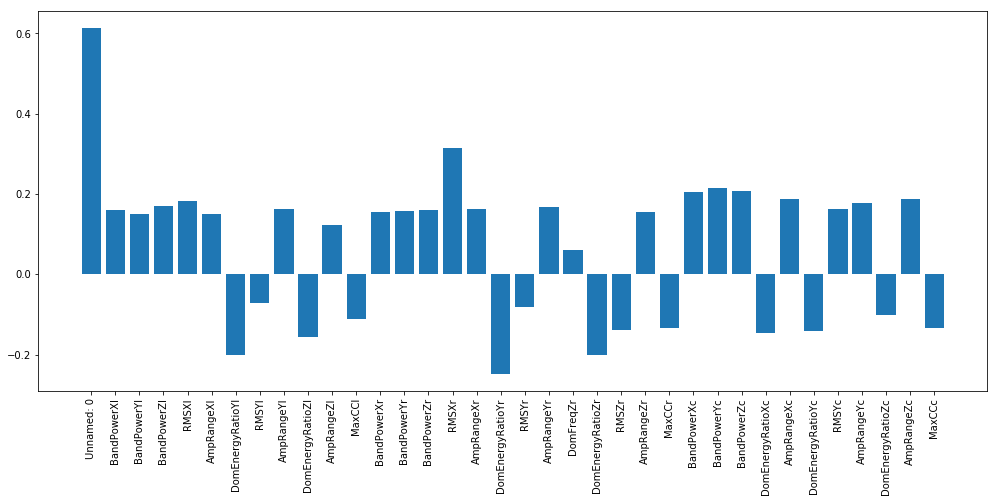

In [12]:
dat = esmFeatures.filter(regex=r'(l|r|c)$')
dat = dat.filter(regex=r'^((?!sanpar).)*$')
dat = esmFeatures.drop(esmColumns,axis=1)
feats = list(dat.keys())
rs = np.zeros((len(feats)))
ps = np.zeros((len(feats)))
for i,f in enumerate(feats):
    rs[i], ps[i] = spearmanr(esmFeatures['sanpar_stijf'],dat[f])

fig = plt.figure(0,(17,7))
plt.bar(np.array(feats)[ps<0.05],rs[ps<0.05])
plt.xticks(rotation=90)
plt.show()


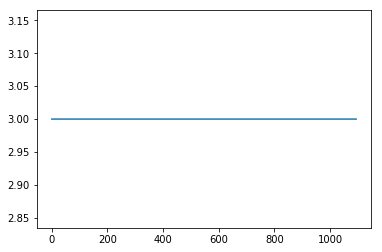

In [46]:
plt.plot(esmFeatures['sanpar_onoff'])

In [41]:
# Spearman Correlations
r, p = spearmanr(esmFeatures['sanpar_stijf'],esmFeatures['sanpar_traag'])
print('Spearman correlation of r = %f with a p-value of %f' % (r, p))

Spearman correlation of r = 0.515480 with a p-value of 0.000000


In [15]:
### Use Machine Learning to predict some variable from the esm

# Linear Regression

lr = LinearRegression()
# Fitting the linear regression to the data
lr.fit(esmFeatures[['BandPowerXr','BandPowerYl']].values,esmFeatures['sanpar_tremor'])
# Looking at model parameters
# Regression weights
print('Weights are %f, %f' % (lr.coef_[0], lr.coef_[1]))
# Intercept
print('Intercept is %f' % lr.intercept_)

# Predict target variable based on input data (should be unseen data)
prediction = lr.predict(esmFeatures[['BandPowerXr','BandPowerYl']].values)


Weights are -0.120673, 0.233785
Intercept is 0.936118


In [ ]:
### Data visualization
# Bar plot
fig,ax = plt.subplots()
ax.bar(range(3), lr.coef_,color='r',width=0.4)
ax.bar(np.arange(3)+0.4, lr.coef_+0.01, color='b',width=0.4)
plt.xlabel('Features')
plt.ylabel('Weight')
plt.title('Linear Regression Weights')
plt.xticks(range(3),['BandPowerXR','BandPowerYL', '#MovementsXL'])
plt.yticks(np.arange(0,0.1,0.02))
plt.savefig('weights.png',dpi=60)
plt.show()

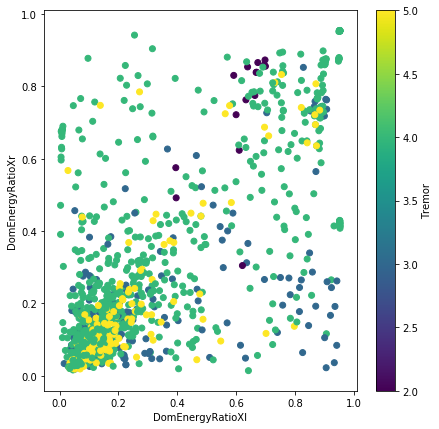

In [50]:
# Scatter Plot
feature1='DomEnergyRatioXl'
feature2='DomEnergyRatioXr'
fig, ax = plt.subplots(figsize=(7,7))
s1 = ax.scatter(esmFeatures[feature1], esmFeatures[feature2], c=esmFeatures['sanpar_stijf'])
plt.xlabel(feature1)
plt.ylabel(feature2)
fig.colorbar(s1,label='Tremor')
plt.show()

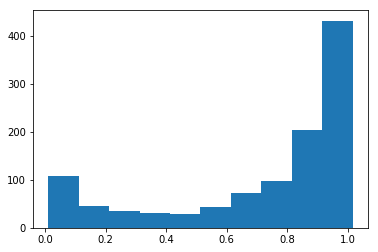

In [20]:
# Histogram
plt.hist(esmFeatures['RMSXc'])
plt.show()

In [21]:
# Principal Component Analysis
def pca(data):
    # Calculate Covariance Matrix
    cov=np.cov(data.T)
    # Calculate Eigenvalues and Eigenvectors
    w, v = np.linalg.eig(cov)
    # Sort them
    s= np.argsort(w)[::-1]
    return v[:,s]

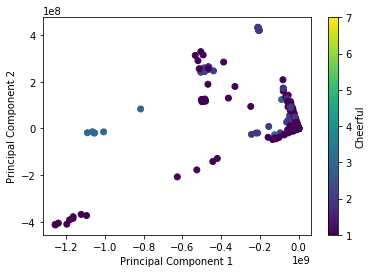

In [24]:
# Could also be done in only sensor/esm spaces
dat = esmFeatures.filter(regex=r'(l|r|c)$').values.astype(float)
esmEigenVectors = pca(dat)
transformedFeatureSpace =np.dot(esmEigenVectors[:,:2].T,dat.T).T
s1 = plt.scatter(transformedFeatureSpace[:,0],transformedFeatureSpace[:,1],c=esmFeatures['sanpar_tremor'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(s1, label = 'Cheerful')
plt.show()

In [ ]:
## It is very easy to use a more powerful Machine Learning algorithm


est = GradientBoostingRegressor()
# Fitting the regression model to our data
est.fit(esmFeatures[['BandPowerXR','BandPowerYL', '#MovementsXL']].values,esmFeatures['stress'])

# Interpreting the model
print(est.feature_importances_)

# Predict target variable based on input data (should be unseen data)
prediction = est.predict(esmFeatures[['BandPowerXR','BandPowerYL', '#MovementsXL']].values)

In [ ]:
### Experiments with Orientation estimation
signal_labels, timeStamps, sigbufs, sr = readData(leftWristFile)

### Transform Gyro data into orientation estimation
from madgwickahrs import MadgwickAHRS
mw = MadgwickAHRS(sampleperiod=1/sr)
euler = np.zeros((3,sigbufs.shape[1]))
for sample in range(sigbufs.shape[1]):
    mw.update_imu(sigbufs[6:,sample],sigbufs[3:6,sample])
    euler[:,sample] = mw.quaternion.to_euler123()

plt.matshow(euler,aspect='auto')
plt.yticks([0,1,2],['Roll', 'Pitch', 'Yaw'])
plt.xlabel('Time in samples')
plt.show()